In [1]:
import numpy as np
import pandas as pd
#import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Advertising.csv')
pd.set_option('display.max_rows', None)

## EDA-Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#dropping the 'Unnamed:0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#check for null or missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#no null value found

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.duplicated().sum()

0

### Checking Assumptions for Linear Regression

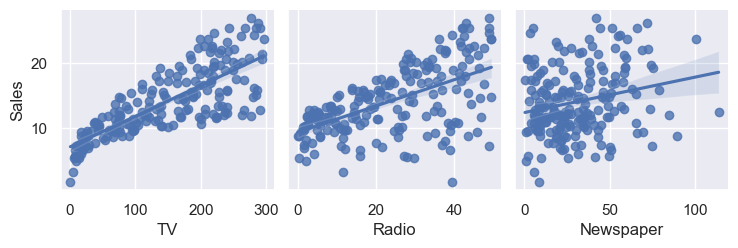

In [10]:
#to check the linearity assumption between each independent variable and the dependent variable
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")
#kind="reg" argument to include regression lines in the scatter plots.

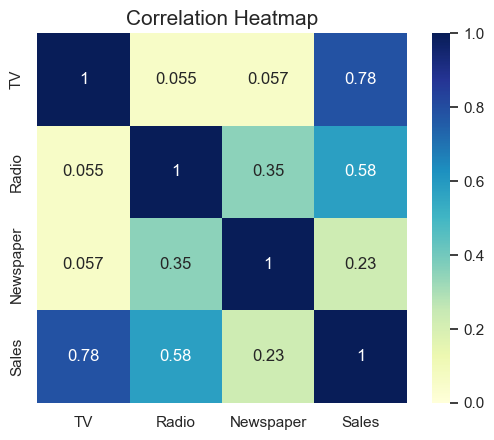

In [11]:
#to check for multicollinearity among independent/dependent variables
corr = df.corr() #computes the correlation matrix of dataframe df
sns.heatmap(corr, vmin=0, vmax=1, square=True, cmap="YlGnBu",annot=True)
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

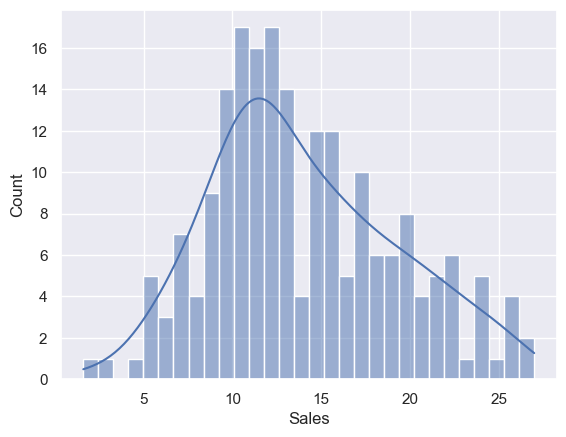

In [12]:
# Histogram to check the normality assumption of the dependent variable (Sales)
sns.histplot(df['Sales'],bins=30, kde=True)

In [13]:
#histogram represents a bell-shaped curve so normality assumption is satisfied

<Axes: xlabel='Sales', ylabel='Density'>

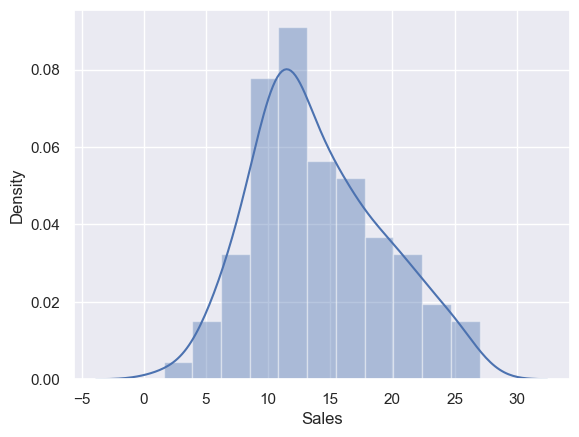

In [14]:
sns.distplot(df['Sales'])

## Building Linear Regression Model

In [15]:
#declare inputs and targets
targets=df['Sales']
inputs=df.drop(['Sales'],axis=1)

In [16]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.2,random_state=365)

In [17]:
#create regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
#lets store the predicted values of TRAIN data
y_hat=reg.predict(x_train)

Text(0.5, 1.0, 'Residuals_pdf')

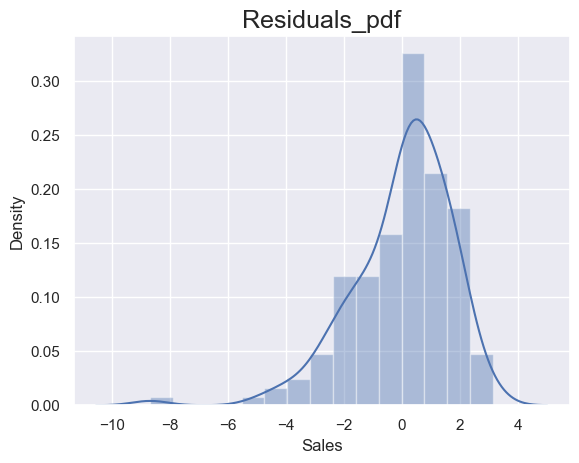

In [19]:
##lets comapre taregts and predicted value using RESIDUAL PLOT 
sns.distplot(y_train-y_hat)
plt.title("Residuals_pdf",size=18)

In [20]:
#the above visualization also verifies our ASSUMPTION that errors are normally distributed,mean is 0

In [21]:
#calculating R-squared for training data
reg.score(x_train,y_train)

0.8958715278958334

In [22]:
#R-squared is around 89.58% ~ 90% so our model explains around 90% of variability of data

In [23]:
#finding weights
reg_summary=pd.DataFrame(inputs.columns,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,TV,0.046942
1,Radio,0.192147
2,Newspaper,-0.004005


In [24]:
#A positive weight shows as feature(here, TV and Radio) increases its value,so does dependent variable (Sales)
#A negative weight shows as feature(here, Newspaper) increases its value,Sales decreases.

### Testing
Let's test how our model performed.

In [25]:
y_hat_test=reg.predict(x_test)   #finding predictions

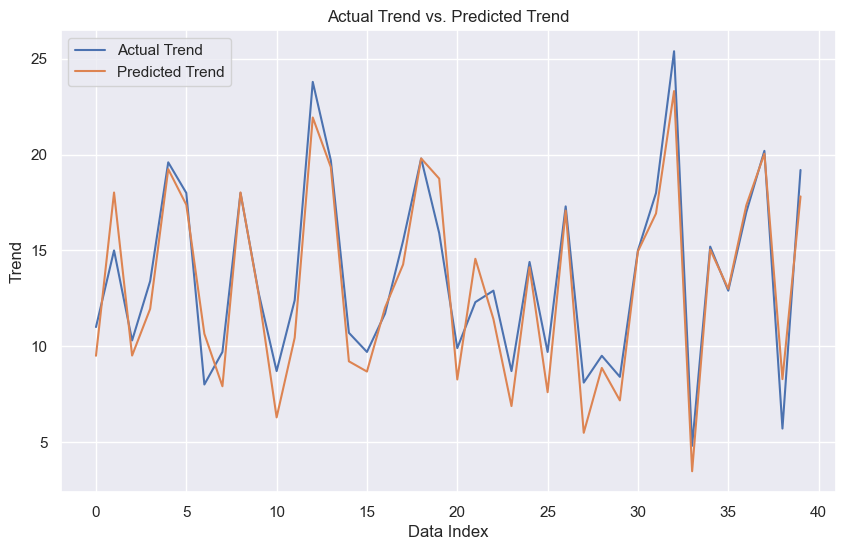

In [29]:
#let's compare actual and predicted values using trend-lines
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_hat_test, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()
print() 

In [31]:
##calculating R-squared for testing data
reg.score(x_test,y_test)

0.8976354433192076

### R-squared is around 89.76% ~ 90% so our model explains around 90% of variability of data